Ricardo Kaleb Flores Alfonso, Tec-21

Importamos las librerias necesarias

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway 

Leemos la base de datos

In [5]:
df = pd.read_csv("aldrin.csv")
df.head()

,aldrin,depth
0,3.8,bottom
1,4.8,bottom
2,4.9,bottom
3,5.3,bottom
4,5.4,bottom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aldrin  30 non-null     float64
 1   depth   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


Graficamos las distintas categorias

<Axes: xlabel='aldrin', ylabel='depth'>

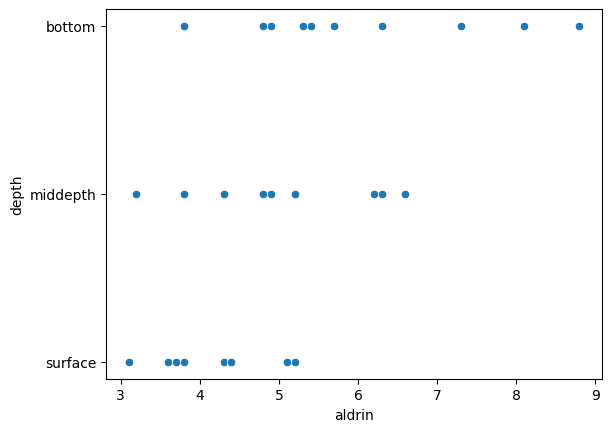

In [7]:
sns.scatterplot(x='aldrin', y='depth', data=df)

In [8]:
df.groupby('depth').describe()

aldrin                                             
          count  mean       std  min    25%   50%   75%  max
depth                                                       
bottom     10.0  6.04  1.579170  3.8  5.000  5.55  7.05  8.8
middepth   10.0  5.05  1.103781  3.2  4.425  5.05  5.95  6.6
surface    10.0  4.20  0.659966  3.1  3.725  4.35  4.40  5.2

Parece que la base de datos muestra una diferencia entre los promedios de concentración, pero es necesario comprobarlo mediante una prueba

<Axes: xlabel='depth', ylabel='aldrin'>

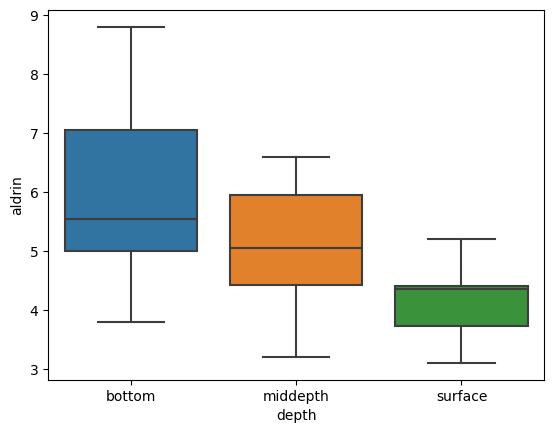

In [9]:
sns.boxplot(x='depth', y='aldrin', data=df)

In [10]:
bottom,middle,top=df.groupby('depth')

In [11]:
x = pd.DataFrame(bottom[1])
x.drop(columns='depth', inplace=True)
y = pd.DataFrame(middle[1])
y.drop(columns='depth', inplace=True)
z = pd.DataFrame(top[1])
z.drop(columns='depth', inplace=True)

# ¿Existe una diferencia entre la concentración promedio de aldrin en el fondo y a media profundidad? 

In [12]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(x,y)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Create a DataFrame
data = df

# Fit the ANOVA model
model = ols('aldrin ~ depth', data=data).fit()

# Create the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

Fail to reject the null hypothesis. There is no significant difference in the mean test scores.
F-statistic: [2.64027657]
P-value: [0.12156624]
ANOVA Table:
             sum_sq    df        F    PR(>F)
depth     16.960667   2.0  6.13381  0.006367
Residual  37.329000  27.0      NaN       NaN


In [13]:
anova_table["MSE"] = anova_table["sum_sq"]/anova_table["df"]

In [14]:
def tstadistic(anova,x,y):
    x_mean=x.mean()[0]
    y_mean=y.mean()[0]
    return (x_mean-y_mean)/np.sqrt((anova["MSE"][1]/len(x))+(anova["MSE"][1]/len(y)))

In [15]:
import scipy.stats as stats

# Define the t-value and degrees of freedom
t_value = tstadistic(anova_table,x,y)
degrees_of_freedom = anova_table["df"][1] #Residuals

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=degrees_of_freedom))

# Round the p-value to three decimal places
rounded_p_value = round(p_value, 3)

print("The p-value is approximately", rounded_p_value)

The p-value is approximately 0.071


## Sin el metodo de Benferroni 

In [16]:
if rounded_p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

Fail to reject the null hypothesis. There is no significant difference in the mean test scores.


## Con el metodo de Benferroni

In [17]:
if rounded_p_value < alpha/3:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

Fail to reject the null hypothesis. There is no significant difference in the mean test scores.


No hay suficiente evidencia para demostrar que existe diferencia en los promedios, incluso con el metodo de Benferroni no se puede mostrar que existe una diferencia en los promedios de concentración de aldrin en el fondo y a media profundidad

# ¿Existe una diferencia entre la concentración promedio de aldrin en el fondo y la superficie?

In [18]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(x,z)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Create a DataFrame
data = df

# Fit the ANOVA model
model = ols('aldrin ~ depth', data=data).fit()

# Create the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

Reject the null hypothesis. There is a significant difference in the mean test scores.
F-statistic: [11.55757852]
P-value: [0.00319403]
ANOVA Table:
             sum_sq    df        F    PR(>F)
depth     16.960667   2.0  6.13381  0.006367
Residual  37.329000  27.0      NaN       NaN


In [19]:
anova_table["MSE"] = anova_table["sum_sq"]/anova_table["df"]

In [20]:
import scipy.stats as stats

# Define the t-value and degrees of freedom
t_value = tstadistic(anova_table,x,z)
degrees_of_freedom = anova_table["df"][1] #Residuals

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=degrees_of_freedom))

# Round the p-value to three decimal places
rounded_p_value = round(p_value, 3)

print("The p-value is approximately", rounded_p_value)

The p-value is approximately 0.002


## Sin el metodo de Benferroni

In [21]:
if rounded_p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

Reject the null hypothesis. There is a significant difference in the mean test scores.


## Con el metodo de Benferroni

In [22]:
if rounded_p_value < alpha/3:
    print("Reject the null hypothesis. There is a significant difference in the mean test scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean test scores.")

Reject the null hypothesis. There is a significant difference in the mean test scores.


Si existe una diferencia significativa en la prueba, por lo que se rechaza la hipotesis nula, lo que demuestra que los promedios son distintos. Esto sucede incluso con el metodo de Benferroni

De esta manera podemos concluir que dada la información que tenemos no hay manera de comprobar que la concentración promedio de aldrin en el fondo y media profundidad sea distinta. Sin embargo la concentración promedio de aldrin en el fondo y la superficie sí es distinta.